In [1]:
#Dependencias
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from pandas.tseries.offsets import DateOffset
from sklearn.metrics import mean_squared_error
from prophet import Prophet
import numpy as np
import warnings
warnings.filterwarnings("ignore")

Importing plotly failed. Interactive plots will not work.


In [6]:
#Carga y preparacion de dataset de dataset
df = pd.read_csv("http://www2.udec.cl/~jorgecastillo/AirPassengers.txt")
df.index = pd.Index(sm.tsa.datetools.dates_from_range('1949m1', '1960m12'))
df.reset_index(inplace = True)
df.drop(columns =['Month'], inplace = True)

df.columns = [
    'ds',
    'y'
]
#df

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Initial log joint probability = -2.46488
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      71       401.582    0.00112356       104.229   1.317e-05       0.001      122  LS failed, Hessian reset 
      99       401.625   1.30954e-05       58.2434      0.2248           1      164   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     148       401.779   8.92908e-05       51.4426   1.995e-06       0.001      263  LS failed, Hessian reset 
     199       401.814   3.76491e-06       65.3491      0.2499           1      329   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     220       401.815   9.33532e-09       74.6943      0.1634      0.1634      360   
Optimization terminated normally: 
  Convergence detected: absolute parameter change was below tolerance


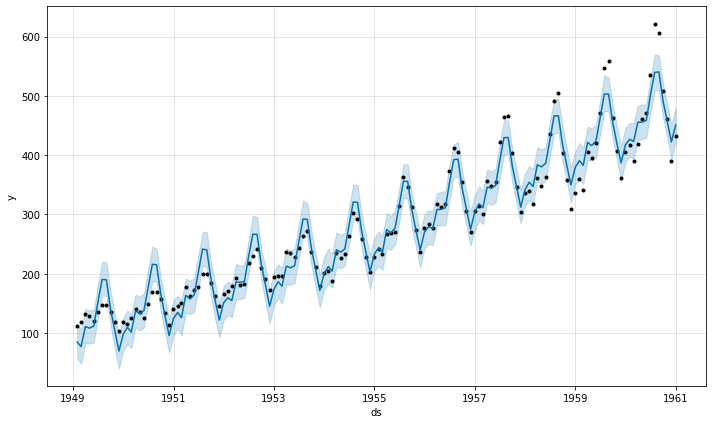

In [ ]:
#2.B estimacion de modelo Prophet
pf = Prophet()
pf.fit(df)
forecast = pf.predict(pf.make_future_dataframe(0, freq='MS'))
fig = pf.plot(forecast)

In [15]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1949-01-31,108.581741,57.498002,113.026304,108.581741,108.581741,-23.890617,-23.890617,-23.890617,-23.890617,-23.890617,-23.890617,0.0,0.0,0.0,84.691124
1,1949-02-28,110.533521,47.789930,106.248783,110.533521,110.533521,-33.303220,-33.303220,-33.303220,-33.303220,-33.303220,-33.303220,0.0,0.0,0.0,77.230301
2,1949-03-31,112.694421,83.129256,140.370883,112.694421,112.694421,-1.847863,-1.847863,-1.847863,-1.847863,-1.847863,-1.847863,0.0,0.0,0.0,110.846558
3,1949-04-30,114.785615,81.924103,137.723365,114.785615,114.785615,-6.522146,-6.522146,-6.522146,-6.522146,-6.522146,-6.522146,0.0,0.0,0.0,108.263468
4,1949-05-31,116.946514,83.768215,139.436488,116.946514,116.946514,-5.280023,-5.280023,-5.280023,-5.280023,-5.280023,-5.280023,0.0,0.0,0.0,111.666492
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139,1960-08-31,473.865021,509.979265,568.242985,473.865021,473.865021,66.672963,66.672963,66.672963,66.672963,66.672963,66.672963,0.0,0.0,0.0,540.537984
140,1960-09-30,476.888317,463.499140,521.209226,476.888317,476.888317,14.688091,14.688091,14.688091,14.688091,14.688091,14.688091,0.0,0.0,0.0,491.576408
141,1960-10-31,480.012389,429.040687,485.234203,480.012389,480.012389,-23.085336,-23.085336,-23.085336,-23.085336,-23.085336,-23.085336,0.0,0.0,0.0,456.927053
142,1960-11-30,483.035684,392.997811,451.223753,483.035684,483.035684,-60.762605,-60.762605,-60.762605,-60.762605,-60.762605,-60.762605,0.0,0.0,0.0,422.273079


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Initial log joint probability = -2.46488
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      71       401.582    0.00112356       104.229   1.317e-05       0.001      122  LS failed, Hessian reset 
      99       401.625   1.30954e-05       58.2434      0.2248           1      164   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     148       401.779   8.92908e-05       51.4426   1.995e-06       0.001      263  LS failed, Hessian reset 
     199       401.814   3.76491e-06       65.3491      0.2499           1      329   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     220       401.815   9.33532e-09       74.6943      0.1634      0.1634      360   
Optimization terminated normally: 
  Convergence detected: absolute parameter change was below tolerance


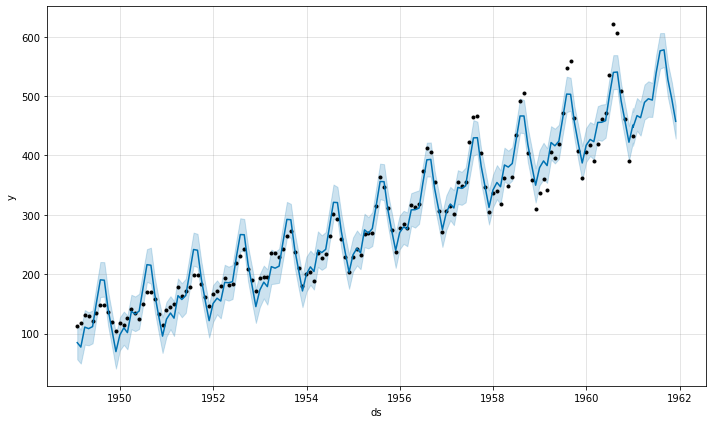

In [3]:
#3.B estimacion futura modelo (12 meses posteriores al final) Prophet
pf = Prophet()
pf.fit(df)
forecast = pf.predict(pf.make_future_dataframe(12, freq='MS'))
fig = pf.plot(forecast)